In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('concertriccir2.csv')

df.columns = ['X', 'Y', 'class']

In [7]:
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


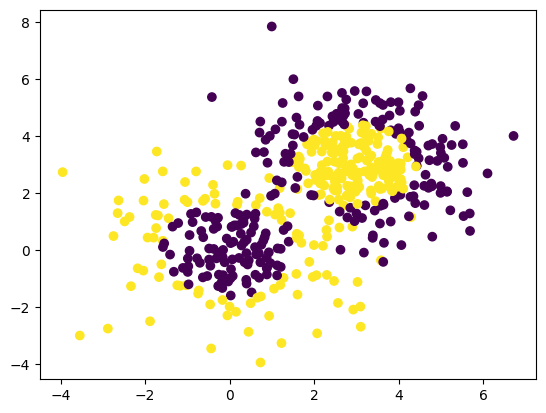

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [11]:
# first, we check it without using 'Batch_Normalization'

model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5363 - loss: 0.8610 - val_accuracy: 0.4400 - val_loss: 1.1570
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5388 - loss: 0.8334 - val_accuracy: 0.4500 - val_loss: 1.0938
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5464 - loss: 0.8099 - val_accuracy: 0.4600 - val_loss: 1.0382
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5464 - loss: 0.7895 - val_accuracy: 0.4600 - val_loss: 0.9896
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5564 - loss: 0.7741 - val_accuracy: 0.4700 - val_loss: 0.9465
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5664 - loss: 0.7596 - val_accuracy: 0.4700 - val_loss: 0.9121
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5664 - loss: 0.7481 - val_accuracy: 0.4900 - val_loss: 0.8851
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5689 - loss: 0.7404 - val_accuracy: 0.

<h2> Using Batch-Normalization concept</h2>

In [16]:
model_2 = Sequential()

# so when we apply 'batch_normalization' on 1st layer, then we get 3*4=12 parameters (6 trainable & 6 non-trainable parameters)
model_2.add(Dense(3,activation='relu',input_dim=2))
model_2.add(BatchNormalization())

#similarly on apply 'batch_normalization' on 2nd layer, we get 2*4=8 parameters (4 trainable & 4 non-trainable parameters)
model_2.add(Dense(2,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(1,activation='sigmoid'))

# finally, we can see total=(6+4)=10 non-trainable parameters.

model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [17]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history2 = model_2.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5414 - loss: 0.8356 - val_accuracy: 0.4300 - val_loss: 0.8502
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5539 - loss: 0.8317 - val_accuracy: 0.4300 - val_loss: 0.8043
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5689 - loss: 0.8008 - val_accuracy: 0.4300 - val_loss: 0.7767
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5940 - loss: 0.7682 - val_accuracy: 0.4300 - val_loss: 0.7571
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5990 - loss: 0.7496 - val_accuracy: 0.4300 - val_loss: 0.7452
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5915 - loss: 0.7373 - val_accuracy: 0.4300 - val_loss: 0.7373
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5815 - loss: 0.7266 - val_accuracy: 0.4300 - val_loss: 0.7297
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5764 - loss: 0.7052 - val_accuracy: 0.

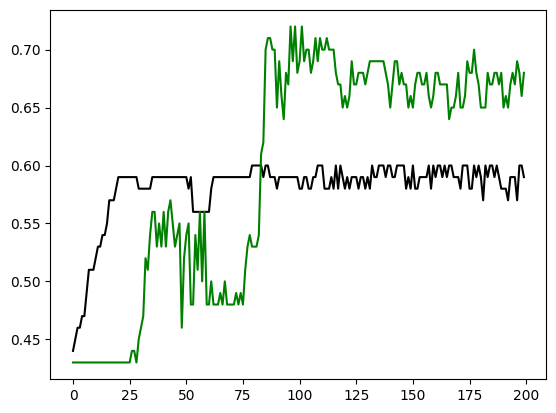

In [22]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

# where 'green_curve' shows 'Batch_normalization' 

In [21]:
# so we see not only 'accuracy_on_training' is good but also we can achieve more accuracy on less no. of epochs.